In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import geopandas as gpd

# Main Data

In [2]:
df = pd.read_excel('Retention_Donor Data_09.19.2025.xlsx')
df = df.iloc[:, :-5] 

In [3]:
df.head()

,Name,Gender,Primary City,Groups,Board Member,Home Owner,Primary State,Primary ZIP Code,Employer,Has Visited Website,...,Last Year Fundraised,Last Year Raised,Last Year Revenue,Latest Transaction Amount,Latest Transaction Date,Lifetime Fundraised,Lifetime Raised,Lifetime Revenue,Year-To-Date Raised,Year-To-Date Revenue
0,1045 Real Estate,NaN,Town and Country,Lapsed|Organizations|Realty Groups,NaN,NaN,MO,63017-8362,NaN,False,...,0,0.00,0.00,0.00,2022-01-06,0.0,0.00,0.00,0.0,0.0
1,1st Step Family Wellness,NaN,St. Louis,Lapsed,NaN,NaN,MO,63122,NaN,False,...,0,25.73,25.73,25.73,2024-01-09,0.0,25.73,25.73,0.0,0.0
2,2B Residential,NaN,Saint Louis,Lapsed|Residential,NaN,NaN,MO,63131-1836,NaN,False,...,0,0.00,0.00,0.00,2024-04-12,0.0,0.00,0.00,0.0,0.0
3,4 Hands Brewing Company LLC,NaN,Saint Louis,Lapsed|Organizations,NaN,NaN,MO,63104-2914,NaN,False,...,0,0.00,0.00,2885.30,2022-01-07,0.0,9738.77,9738.77,0.0,0.0
4,50 Roses Foundation,NaN,University City,Lapsed|Organizations|Foundations,NaN,NaN,MO,63130-4016,NaN,False,...,0,0.00,0.00,2630.00,2020-09-22,0.0,2630.00,2630.00,0.0,0.0


In [4]:
print('Total Entries:',len(df))

Total Entries: 17232


In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17232 entries, 0 to 17231
Data columns (total 27 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Name                         17232 non-null  object        
 1   Gender                       15525 non-null  object        
 2   Primary City                 15879 non-null  object        
 3   Groups                       17227 non-null  object        
 4   Board Member                 54 non-null     object        
 5   Home Owner                   15045 non-null  object        
 6   Primary State                15884 non-null  object        
 7   Primary ZIP Code             15878 non-null  object        
 8   Employer                     484 non-null    object        
 9   Has Visited Website          17232 non-null  bool          
 10  Website Visits Last 30 Days  17232 non-null  int64         
 11  Net Worth Decile             7990 non-nul

In [6]:
print(df.describe())

       Website Visits Last 30 Days  Number of Transactions  \
count                 17232.000000            17232.000000   
mean                      0.025650                1.956650   
min                       0.000000                0.000000   
25%                       0.000000                1.000000   
50%                       0.000000                1.000000   
75%                       0.000000                2.000000   
max                      22.000000              211.000000   
std                       0.299019                5.859638   

              First Transaction Date  First Transaction Amount  \
count                          14763              14763.000000   
mean   2022-01-25 00:57:15.399309056                 83.434396   
min              2002-04-07 00:00:00                  0.000000   
25%              2020-07-03 00:00:00                  0.000000   
50%              2022-03-25 00:00:00                  0.000000   
75%              2024-01-04 00:00:00         

In [7]:
print(df.head())

                          Name Gender      Primary City  \
0             1045 Real Estate    NaN  Town and Country   
1     1st Step Family Wellness    NaN         St. Louis   
2               2B Residential    NaN       Saint Louis   
3  4 Hands Brewing Company LLC    NaN       Saint Louis   
4          50 Roses Foundation    NaN   University City   

                               Groups Board Member Home Owner Primary State  \
0  Lapsed|Organizations|Realty Groups          NaN        NaN            MO   
1                              Lapsed          NaN        NaN            MO   
2                 Lapsed|Residential           NaN        NaN            MO   
3                Lapsed|Organizations          NaN        NaN            MO   
4    Lapsed|Organizations|Foundations          NaN        NaN            MO   

  Primary ZIP Code Employer  Has Visited Website  ...  Last Year Fundraised  \
0       63017-8362      NaN                False  ...                     0   
1           

In [8]:
headers = df.columns.tolist()
headers

['Name',
 'Gender',
 'Primary City',
 'Groups',
 'Board Member',
 'Home Owner',
 'Primary State',
 'Primary ZIP Code',
 'Employer',
 'Has Visited Website',
 'Website Visits Last 30 Days',
 'Net Worth Decile',
 'Number of Transactions',
 'First Transaction Date',
 'First Transaction Amount',
 'Largest Transaction Amount',
 'Largest Transaction Date',
 'Last Year Fundraised',
 'Last Year Raised',
 'Last Year Revenue',
 'Latest Transaction Amount',
 'Latest Transaction Date',
 'Lifetime Fundraised',
 'Lifetime Raised',
 'Lifetime Revenue',
 'Year-To-Date Raised',
 'Year-To-Date Revenue']

In [9]:
print(df.isna().sum())

Name                               0
Gender                          1707
Primary City                    1353
Groups                             5
Board Member                   17178
Home Owner                      2187
Primary State                   1348
Primary ZIP Code                1354
Employer                       16748
Has Visited Website                0
Website Visits Last 30 Days        0
Net Worth Decile                9242
Number of Transactions             0
First Transaction Date          2469
First Transaction Amount        2469
Largest Transaction Amount      2469
Largest Transaction Date        2469
Last Year Fundraised               0
Last Year Raised                   0
Last Year Revenue                  0
Latest Transaction Amount       2469
Latest Transaction Date         2469
Lifetime Fundraised                0
Lifetime Raised                    0
Lifetime Revenue                   0
Year-To-Date Raised                0
Year-To-Date Revenue               0
d

In [10]:
df['Primary State'].unique()

array(['MO', 'WI', 'OK', nan, 'NY', 'IL', 'VA', 'OR', 'SC', 'CA', 'PA',
       'WA', 'MD', 'GA', 'CO', 'MA', 'UT', 'NC', 'IN', 'CT', 'FL', 'SD',
       'OH', 'KY', 'NJ', 'TX', 'KS', 'MN', 'AR', 'MI', 'RI', 'DC', 'NV',
       'AZ', 'DE', 'AL', 'TN', 'NE', 'VI', 'ME', 'ID', 'IA', 'NM', 'ND',
       'HI', 'MS', 'LA', 'MT', 'NH', 'PR', 'ON', 'QC', 'AK'], dtype=object)

In [11]:
df['Number of Transactions'].max()

211

In [12]:
len(df[headers[0]].unique())

3365

In [13]:
state_totals = df['Primary State'].value_counts()

# Missouri Data

In [14]:
# Filter Out None 'MO' Primary State
MO_df = df[df['Primary State'] == 'MO']

In [15]:
# Calculate the Percent of 'MO' Donors
per_MO = round(len(MO_df)/len(df)*100, 2)
print(per_MO)

82.72


In [16]:
MO_df.head(1)

,Name,Gender,Primary City,Groups,Board Member,Home Owner,Primary State,Primary ZIP Code,Employer,Has Visited Website,...,Last Year Fundraised,Last Year Raised,Last Year Revenue,Latest Transaction Amount,Latest Transaction Date,Lifetime Fundraised,Lifetime Raised,Lifetime Revenue,Year-To-Date Raised,Year-To-Date Revenue
0,1045 Real Estate,NaN,Town and Country,Lapsed|Organizations|Realty Groups,NaN,NaN,MO,63017-8362,NaN,False,...,0,0.0,0.0,0.0,2022-01-06,0.0,0.0,0.0,0.0,0.0


In [17]:
# Create Column of 5 Digit ZIP Codes
MO_df = MO_df.copy()
MO_df['ZIP5'] = MO_df['Primary ZIP Code'].astype(str).str.extract(r'(\d{5})')[0].str.zfill(5)

In [18]:
print('Unique ZIP Codes:', len(MO_df['Primary ZIP Code'].unique()))
print('Unique 5 Digit ZIP Codes:', len(MO_df['ZIP5'].unique()))

Unique ZIP Codes: 10802
Unique 5 Digit ZIP Codes: 205


In [19]:
# Import Zip Code Data from US Census
path = '/Users/holtstewart/Documents/08_WashU/01_FALL2025/EiC/tl_2023_us_zcta520/tl_2023_us_zcta520.shp'
zcta = gpd.read_file(path)

In [20]:
print(zcta.columns)

Index(['ZCTA5CE20', 'GEOID20', 'GEOIDFQ20', 'CLASSFP20', 'MTFCC20',
       'FUNCSTAT20', 'ALAND20', 'AWATER20', 'INTPTLAT20', 'INTPTLON20',
       'geometry'],
      dtype='object')


In [21]:
MO_zcta = zcta[zcta['ZCTA5CE20'].str[:3].astype(int).between(630, 658)].copy()
MO_zcta['ZCTA5CE20'] = MO_zcta['ZCTA5CE20'].astype(str).str.zfill(5)

In [22]:
# Sum Lifetime Revenue Per 5 Digit ZIP Code
value = 'Lifetime Revenue'
MO_df = MO_df.dropna(subset=['ZIP5'])

MO_df_agg = (MO_df.groupby('ZIP5', as_index=False)[value].sum().rename(columns={'ZIP5': 'ZCTA5CE20'}))
MO_df_agg["ZCTA5CE20"] = MO_df_agg['ZCTA5CE20'].str.zfill(5)

In [23]:
# Merge Missouri ZIP Polygons
MO_map = MO_zcta.merge(MO_df_agg, on="ZCTA5CE20", how="left")

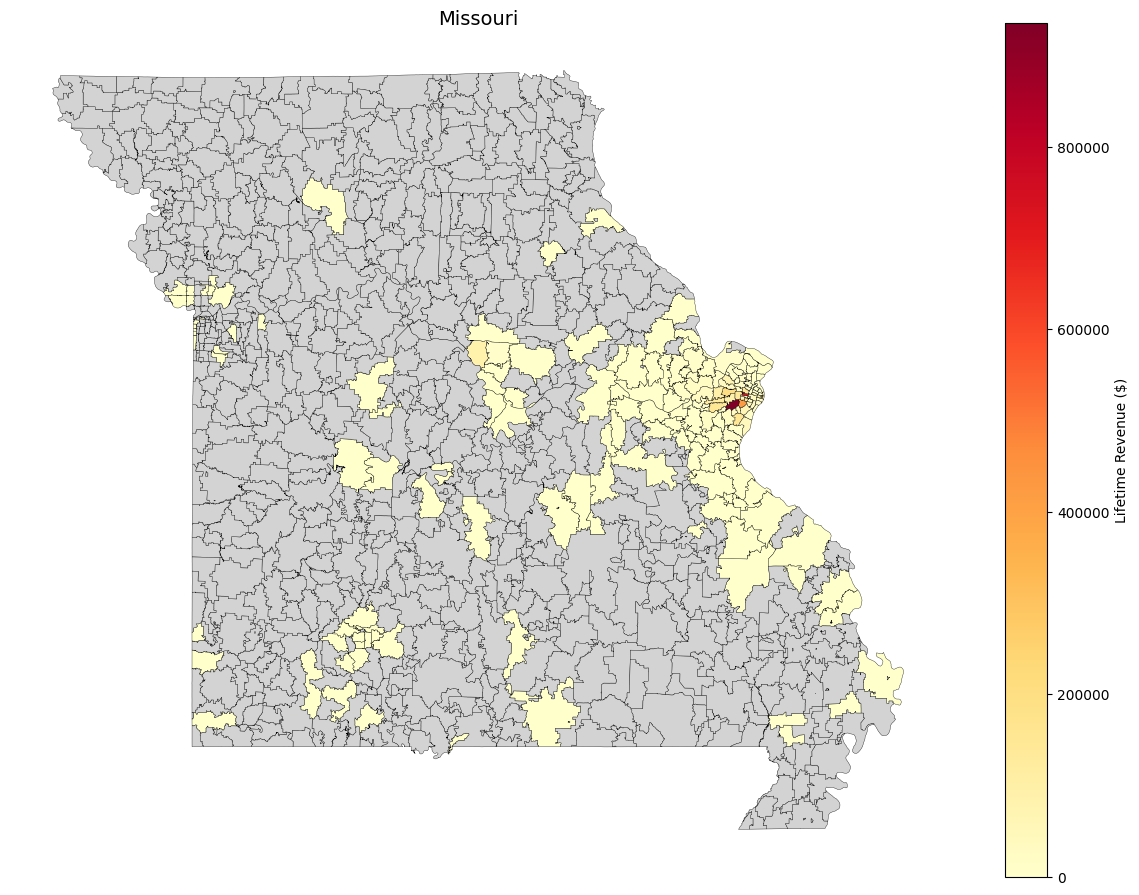

In [28]:
# Create Map Plot
fig, ax = plt.subplots(figsize=(12, 9))
MO_map.plot(
    column=value,
    cmap='YlOrRd',
    edgecolor='black',
    linewidth=0.25,
    legend=True,
    legend_kwds={'label': 'Lifetime Revenue ($)', 'orientation': 'vertical'},
    missing_kwds={'color': 'lightgray', 'edgecolor': 'black', 'label': 'No data'},
    ax=ax
)
ax.set_title('Missouri', fontsize=14)
ax.axis('off')
plt.tight_layout()
plt.show()

In [25]:
# Print Top 5 Zip Codes by Revenue
top5 = MO_df_agg.sort_values(by=value, ascending=False).head(5)

for _, row in top5.iterrows():
    print(f"ZIP: {row['ZCTA5CE20']} | Total {value}: {row[value]:,.2f}")

ZIP: 63122 | Total Lifetime Revenue: 935,233.11
ZIP: 63105 | Total Lifetime Revenue: 727,487.73
ZIP: 63119 | Total Lifetime Revenue: 420,832.75
ZIP: 63101 | Total Lifetime Revenue: 228,838.58
ZIP: 63141 | Total Lifetime Revenue: 198,452.55


In [26]:
MO_df['ZIP5'].min()

'01234'

In [27]:
MO_zcta

,ZCTA5CE20,GEOID20,GEOIDFQ20,CLASSFP20,MTFCC20,FUNCSTAT20,ALAND20,AWATER20,INTPTLAT20,INTPTLON20,geometry
5580,63447,63447,860Z200US63447,B5,G6350,S,233733071,634796,+40.0944045,-091.9088955,"POLYGON ((-91.97469 40.05488, -91.97419 40.055..."
5581,65049,65049,860Z200US65049,B5,G6350,S,48003890,25102012,+38.1999578,-092.6745205,"POLYGON ((-92.76452 38.19186, -92.76444 38.194..."
5582,63051,63051,860Z200US63051,B5,G6350,S,111402766,639431,+38.3777772,-090.5766352,"POLYGON ((-90.67666 38.41512, -90.67579 38.415..."
6695,65010,65010,860Z200US65010,B5,G6350,S,157274868,459070,+38.7878104,-092.2419747,"POLYGON ((-92.37624 38.80167, -92.37600 38.801..."
6696,65801,65801,860Z200US65801,B5,G6350,S,53806,0,+37.2142104,-093.2952177,"POLYGON ((-93.29636 37.21362, -93.29634 37.214..."
...,...,...,...,...,...,...,...,...,...,...,...
7726,64865,64865,860Z200US64865,B5,G6350,S,194439278,128721,+36.8426512,-094.5813135,"POLYGON ((-94.61858 36.88335, -94.61858 36.883..."
7727,64151,64151,860Z200US64151,B5,G6350,S,34031607,451967,+39.2153553,-094.6300842,"POLYGON ((-94.66416 39.21064, -94.66416 39.210..."
13464,65733,65733,860Z200US65733,B5,G6350,S,168401366,20636087,+36.5330973,-092.8512451,"POLYGON ((-92.94166 36.52610, -92.94091 36.527..."
13558,65729,65729,860Z200US65729,B5,G6350,S,52211614,3315100,+36.5388895,-092.5635121,"POLYGON ((-92.63345 36.45531, -92.63336 36.455..."
